In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

In [2]:
tf.__version__

'2.8.2'

## Part 1 - Data Preprocessing

In [3]:
data_set = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Spectograms/spectrograms',
    labels="inferred",
    label_mode="int",
    color_mode="grayscale",
    batch_size=32,
    image_size=(64, 64),
    seed=64,
    shuffle=True,
    subset='training',
    validation_split=0.2
)

data_set_v = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Spectograms/spectrograms',
    labels="inferred",
    label_mode="int",
    color_mode="grayscale",
    batch_size=32,
    image_size=(64, 64),
    seed=64,
    shuffle=True,
    subset='validation',
    validation_split=0.2
)

Found 8732 files belonging to 10 classes.
Using 6986 files for training.
Found 8732 files belonging to 10 classes.
Using 1746 files for validation.





## Part 2 -CNN Model




In [4]:
cnn = tf.keras.models.Sequential()

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', input_shape=[64, 64, 1]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [8]:
cnn.add(tf.keras.layers.Flatten())

In [9]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))

In [11]:
cnn.add(tf.keras.layers.Dense(10, activation="softmax"))

In [12]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 5)

In [14]:
cnn.fit(
    x = data_set,
    validation_data = data_set_v,
    batch_size = 128,
    verbose=1,
    epochs = 50,
    callbacks = [early_stop]
)

Epoch 1/50
219/219 [==============================] - 608s 3s/step - loss: 2.1981 - accuracy: 0.2121 - val_loss: 1.7684 - val_accuracy: 0.3677
Epoch 2/50
219/219 [==============================] - 163s 737ms/step - loss: 1.8048 - accuracy: 0.3350 - val_loss: 1.5122 - val_accuracy: 0.4794
Epoch 3/50
219/219 [==============================] - 163s 737ms/step - loss: 1.5249 - accuracy: 0.4410 - val_loss: 1.2801 - val_accuracy: 0.5636
Epoch 4/50
219/219 [==============================] - 164s 741ms/step - loss: 1.3206 - accuracy: 0.5147 - val_loss: 1.1047 - val_accuracy: 0.6105
Epoch 5/50
219/219 [==============================] - 163s 740ms/step - loss: 1.1533 - accuracy: 0.5769 - val_loss: 0.9823 - val_accuracy: 0.6695
Epoch 6/50
219/219 [==============================] - 164s 744ms/step - loss: 1.0415 - accuracy: 0.6287 - val_loss: 0.9551 - val_accuracy: 0.6804
Epoch 7/50
219/219 [==============================] - 163s 737ms/step - loss: 0.9482 - accuracy: 0.6643 - val_loss: 0.8962 - va

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

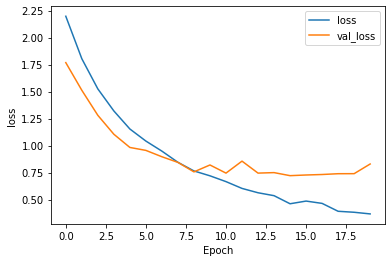

In [18]:
plt.plot(cnn.history.history["loss"], label = "loss")
plt.plot(cnn.history.history["val_loss"], label = "val_loss")

plt.xlabel("Epoch")
plt.ylabel("loss")

plt.legend()

plt.show()

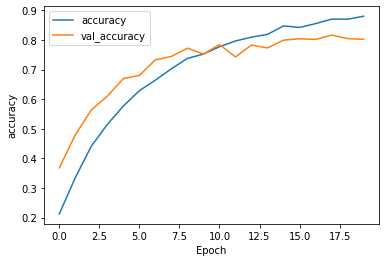

In [19]:
plt.plot(cnn.history.history["accuracy"], label = "accuracy")
plt.plot(cnn.history.history["val_accuracy"], label = "val_accuracy")

plt.xlabel("Epoch")
plt.ylabel("accuracy")

plt.legend()

plt.show()